# Capital Asset Pricing Model

## A teoria por trás:

Neste notebook, estarei falando sobre o CAPM (Capital Asset Pricing Model) ou, Modelo de Precificação de Ativos Financeiros.

O CAPM se trata de um modelo (com fórmula muito semelhante de uma regressão linear) que conversará com a fronteira eficiente de Markowitz, para determinar o retorno esperado de um ativo.

Por meio do CAPM, começamos a admitir a existência de *ativos livres de risco*, *beta* de ativos e *prêmio de risco* e tudo isso vou explicando mais em detalhe a frente conforme for mostrando a aplicação em Python

Bem basicamente, antes de começar a entrar nas especificades, vale uma breve explicação: uma coisa é a fronteira eficiente de Markowitz, que nos mostra as melhores combinações entre ativos para cada nível de risco que um investidor está disposto a aceitar. O que o CAPM vai fazer é introduzir conceitos que em muito conversarão com toda a teoria de Markowitz (tanto que o desenvolvimento dos conceitos do CAPM tiveram sua participação) e vão "ajudar" na determinação dos portfolios dentro da fronteira de Markowitz

Admito que isso tudo pode ter parecido muito básico e introdutório, mas acredito que ficará mais claro de acordo com as explicações dos componentes do CAPM e as aplicações que começarei a fazer agora:

## Beta:

O índice beta de um ativo é um indicador de como uma ação, por exemplo, se move de acordo com oscilações no mercado como um todo. Entenda como a sensibilidade de uma ação aos movimentos do mercado e como um indicador de seu nível de risco sistemático!

Vejamos a fórmula do CAPM:

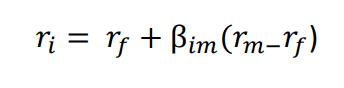

Leia-se da seguinte maneira: O retorno esperado de uma ativo específico é igual ao retorno livre de risco mais o beta desse ativo, multiplicando a diferença entre o retorno do mercado e o retorno livre de risco (essa diferença nada mais é do que o prêmio de risco!).

Se você estiver bem familiarizado com o conceito de regressão linear, ou então com geometria básica mesmo, verá que isso se aparenta muito com uma equação de reta! E você está certo, tanto que essa fórmula é utilizada para construir a CML (Capital Market Line).

Por ora, vamos focar no ``beta``, e, olhando pela ótica matemática, vemos que faz sentido ser o indicador de quanto uma ação é sensível ao mercado, justamente por que se trata do coeficiente de inclinação da reta!

Bom, com o conceito do ``beta`` introduzido, agora vamos ao código: como de fato calculamos o indicador beta de uma ação? Na verdade é relativamente simples, se você está familiar à fórmula de calcular o coeficiente de inclinação de uma regressão linear, se sentirá bem confortável:

In [1]:
# Vamos primeiramente importar as libs necessárias:

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import seaborn as sns

c:\users\joao\appdata\local\programs\python\python37\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Vamos puxar os dados do Ibovespa e da Petrobras para calcular seu beta:

ativos = ['PETR4.SA', '^BVSP']

dados = pd.DataFrame()

for ativo in ativos:
    dados[ativo] = wb.DataReader(name=ativo, data_source='yahoo', start='2016-1-1', end='2020-12-31')['Adj Close']

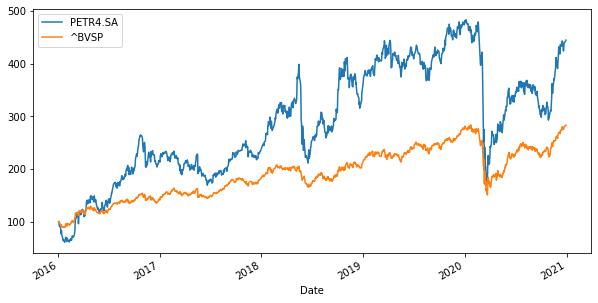

In [3]:
(dados / dados.iloc[0] * 100).plot(figsize=(10, 5))
# Plotando os dados do nosso DF normalizados para 100

In [5]:
log_retornos = np.log(dados / dados.shift(1))

In [6]:
log_retornos

,PETR4.SA,^BVSP
Date,,
2016-01-04,NaN,NaN
2016-01-05,-0.028046,0.006575
2016-01-06,-0.042820,-0.015346
2016-01-07,-0.022118,-0.026145
2016-01-08,0.001596,-0.002042
...,...,...
2020-12-22,0.009577,0.002858
2020-12-23,0.024263,0.012886
2020-12-28,0.008195,0.010080


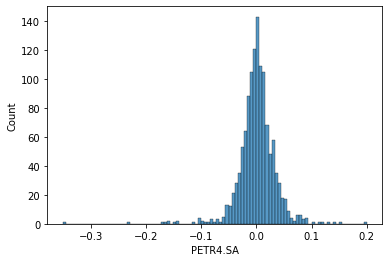

In [7]:
sns.histplot(data=log_retornos['PETR4.SA'])
# Plotando um hist dos retornos de Petro 
# (como esperado, se assemelha a uma distribuição normal)

In [8]:
# Calculando a covariância do ativo com o mercado:
matriz_cov = log_retornos.cov()*252
matriz_cov

,PETR4.SA,^BVSP
PETR4.SA,0.282884,0.122830
^BVSP,0.122830,0.080236


In [9]:
# Dentro da matriz, pegando a cov do ativo com o mercado:
cov = matriz_cov.iloc[0,1]
cov

0.12282984384377821

In [10]:
# Calculando a variância do mercado (representado pelo Ibovespa):

var_mercado = log_retornos['^BVSP'].var()*252
var_mercado

0.08023641106968897

Tendo calculado às métricas acima, lhes apresento a fórmula do ``beta``:

**Beta:**
### $$ 
\beta_{atv} = \frac{\sigma_{atv,m}}{\sigma_{m}^2}
$$

Essa fórmula pode ser traduzida facilmente dessa forma:<br><br>

**O beta de um ativo se dá pela razão entre a covariância desse ativo com o mercado e a variância do mercado!**

Sendo assim, vamos calcular o ``beta`` da Petro:

In [11]:
petr4_beta = cov / var_mercado

In [12]:
petr4_beta

1.5308491769041725

Como esperado, a ação da Petrobras tem um índice beta elevado! O número acima pode ser interpretado da seguinte forma: para cada variação de um ponto no Ibovespa, espera-se uma movimentação da Petrobras equivalente a 1.53 pontos!

**Bem** basicamente, podemos interpretar ações com Beta próximo de 0 como ações seguras em relação ao mercado, porque irão variar menos, tanto positivamente quanto negativamente. Para Beta próximo de 1, temos ações que se comportarão de forma selehante ao mercado, e para Betas maiores do que 1, temos ações que irão replicar o comportamento do mercado de forma amplificada, ou seja, essa ação tende a variar mais do que o mercado tanto positivamente quanto negativamente!

## Agora que entendemos o Beta, vamos voltar ao CAPM:

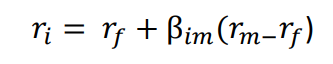

Vamos voltar à fórmula do CAPM e entrar um pouco mais em detalhe sobre ela.

Como eu disse, a fórmula acima deve ser lida da seguinte forma: O retorno esperado de uma ativo específico é igual ao retorno livre de risco mais a o beta de esse ativo, multiplicando a diferença entre o retorno do mercado e o retorno livre de risco.

Destrinchando cada componente dessa fórmula:

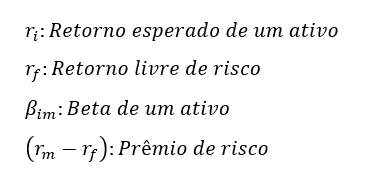

Ou seja, tentando traduzir a fórmula temos o seguinte: consegue-se calcular o retorno esperado de um ativo, baseando-se na taxa livre de risco (que seria basicamente o mínimo de retorno que um investidor deve esperar ao adquirir um ativo), somado ao beta deste ativo que multiplica o prêmio de risco! Ou seja, conforme maior o *beta*, maior o retorno esperado, com tudo o mais constante, porém, via de regra, isso implica em maior risco!

### Se mais delongas, vamos tentar calcular o retorno esperado na prática:

Durante e depois o cálculo, irei fazendo importantes ressalvas:

Irei fazer o cálculo para a ação da Petrobras, aproveitando o beta que já calculei anteriormente. Vamos agora "pegar" o restante das variáveis utilizadas no cálculo:

In [13]:
rf = 0.035 # Selic Meta atual
beta = petr4_beta
rm = 0.54 # Retorno do Ibovespa dos últimos 12 meses 
premio = rm-rf

# Cálculo feito em 10-Maio-2021

In [14]:
retorno_esperado_petr = rf + beta * premio

In [15]:
retorno_esperado_petr

0.8080788343366072

Bom, o cálculo acima nos indica um retorno esperado de ~81% para PETR4!

## Calma lá...

Antes que você ache que eu acabei de lhe fazer a recomendação do século de um investimento, vamos às ressalvas que eu havia mencionado e parar pra pensar um pouco no que acabamos de calcular...

Utilizando a fórmula do CAPM, chegamos em um retorno esperado de ~81% para a Petrobras, beseando-se na Selic Meta atual e retorno do Ibovespa dos últimos 12 meses.

Uma forma possivelmente mais madura de interpretar este dado seria: baseando-se na taxa livre de risco atual, e no retorno que o Ibovespa nos deu nos últimos 12 meses, espera-se que, uma ação com beta de 1,53 tenha um retorno de 80%.

Ou seja, caso o Ibovespa tenha um retorno diferente nos próximos 12 meses, o que é extremamente provável, teremos um retorno esperado radicalmente diferente!

Agora vamos às variáveis que eu defini acima, primeiramente falando-se da taxa livre de risco. Eu, para efeitos de tornar esse cálculo simples sem ter que entrar em mais detalhes, optei por simplesmente utilizar a Selic Meta como taxa livre de risco, o que você poderia fazer e que provavalmente seria ainda mais correto é observar a curva de juros! Atualmente, temos uma curva de juros bem inclinada no Brasil, e olhando-se a ETTJ (Estrutura a Termo de Taxa de Juros) Pré, encontramos taxas de ~7,2% a.a. para títulos com vencimentos de 24 meses, então, provavelmente, para um cálculo mais realista e com aplicações práticas de fato, valeria a pena revisitar a escolha de seu Retorno Livre de Risco!

Agora, falando do retorno de mercado... Sim, seria teoricamente correto simplesmente pegar o retorno dos últimos 12 meses do Ibovespa para obter-se uma estimativa do retorno de mercado, o problema é que os últimos 12 meses foram um período extremamente atípico, não só para os mercados financeiros, mas para o mundo todo, dada a pandemia do coronavírus. Sendo que o nosso índice da bolsa de valores sofreu uma queda extremamente brusca no começo de 2020, e se recuperou ao longo do ano, portanto, acaba-se tendo um retorno maior do que o normal para o índice de mercado, contabilizando este retorno de 80% para a PETR4!

E, além disso, vale mais uma ressalva: não encare a fórmula do CAPM como uma fórmula mágica que lhe permitirá prever o retorno de qualquer ativo com precisão, sendo algo que você pode colocar 100% de confiança. Encare a fórmula do CAPM como uma ferramenta adicional em seu arsenal de análise de ativos, o CAPM, assim como qualquer outro indicador, não deve ser lido isoladamente para lhe auxiliar na decisão de um investimento ou não! Por exemplo, o CAPM, por meio do retorno esperado, nos permite calcular o índice Sharpe, que é um outro indicador bem legal que podemos usar quando avaliamos algum ativo!

Criado por: <br><br>

**u/_jvsm**